数据路径: /root/autodl-fs/xingwei_10000_64_train_v1.npy
样本索引: 1
清晰图(卷积前) 总流强: 1.08876486281e-05
模糊图(卷积后) 总流强: 40484541.6638
差值(lr-hr): 40484541.6638
相对误差(lr-hr)/|hr|: 3.718391e+12
比值 lr/hr: 3.71839130084e+12


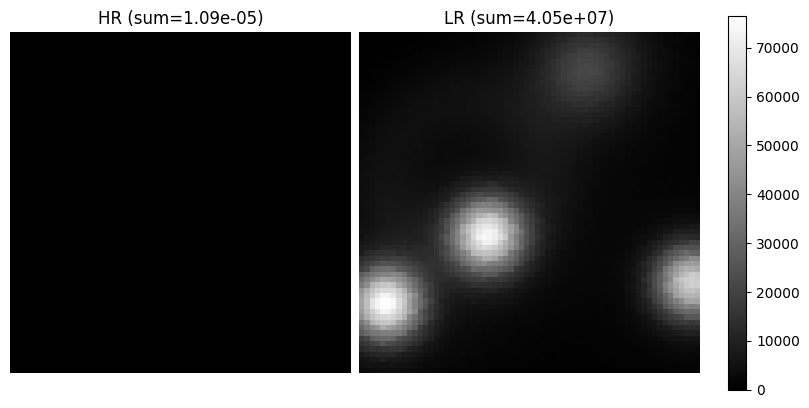

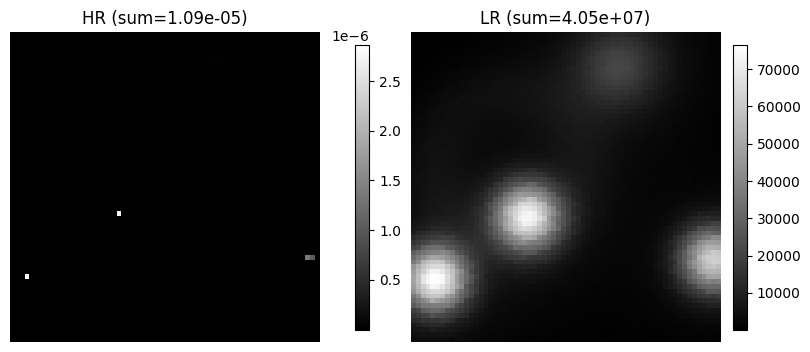

In [12]:
import numpy as np

# === 配置 ===
data_path = "/root/autodl-fs/xingwei_10000_64_train_v1.npy"  # 按你的路径
pair_index = 1  # 第一对图片

# === 加载与检查 ===
arr = np.load(data_path, allow_pickle=True)
assert arr.ndim == 4 and arr.shape[1] == 2, f"数据形状应为 (N,2,H,W)，实际为 {arr.shape}"

# 取出第一对：0→清晰(卷积前)，1→模糊(卷积后)
hr = arr[pair_index, 0].astype(np.float64)  # 清晰图（卷积前）
lr = arr[pair_index, 1].astype(np.float64)  # 模糊图（卷积后）

# === 流强积分（像素求和）===
hr_sum = np.nansum(hr)
lr_sum = np.nansum(lr)

# 评估差异
diff = lr_sum - hr_sum
rel_err = diff / (abs(hr_sum) + 1e-12)  # 相对误差（以HR为基准）
ratio = lr_sum / (hr_sum + 1e-12)

print(f"数据路径: {data_path}")
print(f"样本索引: {pair_index}")
print(f"清晰图(卷积前) 总流强: {hr_sum:.12g}")
print(f"模糊图(卷积后) 总流强: {lr_sum:.12g}")
print(f"差值(lr-hr): {diff:.12g}")
print(f"相对误差(lr-hr)/|hr|: {rel_err:.6e}")
print(f"比值 lr/hr: {ratio:.12g}")

import matplotlib.pyplot as plt
import numpy as np
import os

# 统一色标范围，便于直观比较
vmin = float(min(np.nanmin(hr), np.nanmin(lr)))
vmax = float(max(np.nanmax(hr), np.nanmax(lr)))

fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

im0 = axes[0].imshow(hr, cmap="gray", vmin=vmin, vmax=vmax)
axes[0].set_title(f"HR (sum={hr_sum:.3g})")
axes[0].axis("off")

im1 = axes[1].imshow(lr, cmap="gray", vmin=vmin, vmax=vmax)
axes[1].set_title(f"LR (sum={lr_sum:.3g})")
axes[1].axis("off")

# 共享一个色条
fig.colorbar(im1, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
plt.show()

# （可选）保存到与数据同目录
# out_png = os.path.join(os.path.dirname(os.path.abspath(data_path)), f"pair{pair_index}_hr_lr.png")
# plt.savefig(out_png, dpi=150, bbox_inches="tight")
# print("已保存：", out_png)


import matplotlib.pyplot as plt
import numpy as np

# 假定你已在上文得到 hr, lr, hr_sum, lr_sum 变量

fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

# HR：单独 colorbar（不与右图共享）
im0 = axes[0].imshow(hr, cmap="gray")  # 独立色标范围（自动）
axes[0].set_title(f"HR (sum={hr_sum:.3g})")
axes[0].axis("off")
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# LR：单独 colorbar（不与左图共享）
im1 = axes[1].imshow(lr, cmap="gray")  # 独立色标范围（自动）
axes[1].set_title(f"LR (sum={lr_sum:.3g})")
axes[1].axis("off")
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()

# 如需两图使用同一数值范围但各自拥有独立 colorbar：
# vmin = float(min(np.nanmin(hr), np.nanmin(lr)))
# vmax = float(max(np.nanmax(hr), np.nanmax(lr)))
# im0 = axes[0].imshow(hr, cmap="gray", vmin=vmin, vmax=vmax)
# im1 = axes[1].imshow(lr, cmap="gray", vmin=vmin, vmax=vmax)


In [8]:
import numpy as np

# === 配置 ===
data_path = "/root/autodl-fs/xingwei_10000_64_train_v1.npy"  # 按项目结构
output_hr = "/root/sample0_hr.txt"
output_lr = "/root/sample0_lr.txt"
pair_index = 0

# === 读取数据 ===
arr = np.load(data_path, allow_pickle=True)
hr = arr[pair_index, 0]  # 清晰图
lr = arr[pair_index, 1]  # 模糊图

# === 保存为 txt ===
np.savetxt(output_hr, hr, fmt="%.12g")
np.savetxt(output_lr, lr, fmt="%.12g")

print(f"清晰图已保存到 {output_hr}")
print(f"模糊图已保存到 {output_lr}")


清晰图已保存到 /root/sample0_hr.txt
模糊图已保存到 /root/sample0_lr.txt
